# Preprocess the data

In [1]:
import pandas as pd
import re
import numpy as np
import csv

## Read the input data

In [2]:
input_file1 = "ptm\input_data\TUM_mod_citrullination_l.parquet"
input_file2 = "ptm\input_data\TUM_mod_citrullination_2.parquet"

## Create dataframe

In [3]:
tmp_data1 = pd.read_parquet(input_file1, engine='pyarrow')
tmp_data2 = pd.read_parquet(input_file2, engine='pyarrow')
data = pd.concat([tmp_data1,tmp_data2])

In [4]:
data.head(10)

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,35139,EYYLRYLEK,2,CID,ITMS,271.260,9,1.958759e+06,3.245907e+07,35.0,35.000000,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.15, 0.0, -1...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 276.09326, 0....",0.35000,2,"[0, 1, 0, 0, 0, 0]"
1,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,11544,R[UNIMOD:7]SEDAELR,2,CID,ITMS,82.750,8,4.594588e+04,1.248751e+06,35.0,35.000000,"[0.3285714285714286, 0.0, -1.0, 0.014285714285...","[175.10437, 0.0, -1.0, 158.10068, 0.0, -1.0, 2...",0.35000,2,"[0, 1, 0, 0, 0, 0]"
2,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,11374,R[UNIMOD:7]SEDAELR,2,CID,ITMS,82.750,8,6.663102e+04,1.764581e+06,35.0,35.000000,"[0.24705882352941178, 0.0, -1.0, 0.01176470588...","[175.08893, 0.0, -1.0, 158.1032, 0.0, -1.0, 28...",0.35000,2,"[0, 1, 0, 0, 0, 0]"
3,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31901,LMKFSR[UNIMOD:7]PK,2,HCD,FTMS,82.750,8,2.662628e+05,7.981456e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.68, 0.0, -...","[147.11301, 0.0, -1.0, 0.0, 0.0, -1.0, 244.165...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
4,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,32338,LRVDPVDFK,3,CID,ITMS,82.831,9,1.779733e+06,1.403539e+07,35.0,35.000000,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[147.5854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35000,2,"[0, 0, 1, 0, 0, 0]"
5,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,36206,R[UNIMOD:7]GSLEEIMK,2,CID,ITMS,82.831,9,4.377941e+04,8.755105e+05,35.0,35.000000,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 278.12317, 0....",0.35000,2,"[0, 1, 0, 0, 0, 0]"
6,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,32813,LRVDPVDFK,3,CID,ITMS,82.831,9,1.342419e+05,1.169074e+06,35.0,35.000000,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0,...","[147.07063, 0.0, 0.0, 0.0, 0.0, 0.0, 294.16437...",0.35000,2,"[0, 0, 1, 0, 0, 0]"
7,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,51100,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,2.550472e+05,1.812981e+06,28.0,28.745977,"[0.05, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11281, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
8,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,58853,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,1.675168e+05,1.195226e+06,28.0,28.745977,"[0.07, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11238, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
9,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31153,HTAYSDFLSDK,2,HCD,FTMS,83.137,11,9.453002e+04,1.875683e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.25, 0.0, -...","[147.1124, 0.0, -1.0, 0.0, 0.0, -1.0, 262.1381...",0.28746,1,"[0, 1, 0, 0, 0, 0]"


## Divide data into HCD and CID

In [5]:
data_HCD = data[data['fragmentation']=='HCD']
data_CID = data[data['fragmentation']=='CID']

In [6]:
data_HCD.head(10)

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
3,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31901,LMKFSR[UNIMOD:7]PK,2,HCD,FTMS,82.750,8,2.662628e+05,7.981456e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.68, 0.0, -...","[147.11301, 0.0, -1.0, 0.0, 0.0, -1.0, 244.165...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
7,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,51100,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,2.550472e+05,1.812981e+06,28.0,28.745977,"[0.05, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11281, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
8,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,58853,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,1.675168e+05,1.195226e+06,28.0,28.745977,"[0.07, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11238, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
9,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31153,HTAYSDFLSDK,2,HCD,FTMS,83.137,11,9.453002e+04,1.875683e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.25, 0.0, -...","[147.1124, 0.0, -1.0, 0.0, 0.0, -1.0, 262.1381...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
10,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,35819,HLTGLTFDTYK,2,HCD,FTMS,83.182,11,2.737666e+05,2.303711e+06,28.0,28.745977,"[0.14, 0.0, -1.0, 0.04, 0.0, -1.0, 0.09, 0.0, ...","[147.11293, 0.0, -1.0, 138.06619, 0.0, -1.0, 3...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
13,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,12635,EREELGSPEER,2,HCD,FTMS,83.204,11,3.792262e+05,1.295094e+07,28.0,28.745977,"[0.5675675675675675, 0.0, -1.0, 0.0, 0.0, -1.0...","[175.1189, 0.0, -1.0, 0.0, 0.0, -1.0, 304.1611...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
17,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,24840,VAELRSLYK,3,HCD,FTMS,83.456,9,4.868870e+06,4.552416e+07,28.0,28.745977,"[0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19, 0.0, 0.0,...","[147.11301, 0.0, 0.0, 0.0, 0.0, 0.0, 310.17636...",0.28746,1,"[0, 0, 1, 0, 0, 0]"
19,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31390,EDPMR[UNIMOD:7]ELR,2,HCD,FTMS,82.452,8,3.965483e+05,3.148274e+06,28.0,28.745977,"[0.15, 0.0, -1.0, 0.0, 0.0, -1.0, 0.14, 0.0, -...","[175.11913, 0.0, -1.0, 0.0, 0.0, -1.0, 288.203...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
20,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,25231,DLAQR[UNIMOD:7]SFR,2,HCD,FTMS,82.452,8,5.950818e+04,1.012012e+06,28.0,28.745977,"[0.42, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.1189, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
23,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,30103,EDPMR[UNIMOD:7]ELR,2,HCD,FTMS,82.452,8,5.526744e+05,4.336611e+06,28.0,28.745977,"[0.13, 0.0, -1.0, 0.0, 0.0, -1.0, 0.18, 0.0, -...","[175.11887, 0.0, -1.0, 0.0, 0.0, -1.0, 288.202...",0.28746,1,"[0, 1, 0, 0, 0, 0]"


## Sort for modified_sequence and sort andromeda_score from highest to lowest

In [7]:
data_HCD = data_HCD.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False])

In [8]:
data_HCD

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
9763,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
15599,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
9541,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
15180,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
9440,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
7952,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33906,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,74.841,11,2.297324e+06,1.644743e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


## Select only the top 5 modified_sequences with highest score

In [9]:
data_HCD_5 = data_HCD.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False]).groupby('modified_sequence').head(5)

In [10]:
data_HCD_5.reset_index(inplace=True)

In [11]:
data_HCD_5

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,9763,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
1,15599,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
2,9541,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
3,15180,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
4,9440,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,8279,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24165,12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24166,8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24167,12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


In [12]:
data_CID_5 = data_CID.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False]).groupby('modified_sequence').head(5)

In [13]:
data_CID_5

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
9752,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36607,AAADQMRDFLVR,3,CID,ITMS,144.550,12,1.178367e+06,2.081838e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
15572,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36607,AAADQMRDFLVR,3,CID,ITMS,144.550,12,1.178367e+06,2.081838e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
9633,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36767,AAADQMRDFLVR,3,CID,ITMS,123.670,12,2.009637e+06,3.306189e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
15355,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36767,AAADQMRDFLVR,3,CID,ITMS,123.670,12,2.009637e+06,3.306189e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
9405,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36771,AAADQMRDFLVR,2,CID,ITMS,81.676,12,7.928820e+04,6.763675e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.02, 0.0, -1...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 274.26401, 0....",0.35,2,"[0, 1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8009,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,36281,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,83.862,11,1.118569e+05,6.753046e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
12532,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,36281,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,83.862,11,1.118569e+05,6.753046e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
7943,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,34685,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,79.070,11,1.199249e+05,7.317668e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
12411,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,34685,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,79.070,11,1.199249e+05,7.317668e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"


## Calculate 10% of the dataframes to create a test set

In [14]:
ten_percent_HCD = int(len(data_HCD_5)*0.1)
ten_percent_HCD

2416

In [15]:
ten_percent_CID = int(len(data_CID_5)*0.1)
ten_percent_CID

2657

## Create TEST set

In [16]:
test_HCD = data_HCD_5.head(ten_percent_HCD)
test_HCD

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,9763,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
1,15599,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
2,9541,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
3,15180,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
4,9440,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,37021,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,47742,DGLSLAALKKALAAGGYDVEK,3,HCD,FTMS,120.410,21,2.681073e+05,6.121765e+06,28.0,28.550862,"[0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0,...","[147.11247, 0.0, 0.0, 0.0, 0.0, 0.0, 276.15378...",0.285509,1,"[0, 0, 1, 0, 0, 0]"
2412,21946,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,48845,DGLSLAALKKALAAGGYDVEK,3,HCD,FTMS,82.635,21,8.383431e+04,2.471671e+06,28.0,28.550862,"[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.0, 0.0,...","[147.11293, 0.0, 0.0, 0.0, 0.0, 0.0, 276.15588...",0.285509,1,"[0, 0, 1, 0, 0, 0]"
2413,20398,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28044,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,118.370,20,3.143996e+06,2.723258e+07,28.0,28.824272,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.0...","[175.11852, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16159...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
2414,34372,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28044,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,118.370,20,3.143996e+06,2.723258e+07,28.0,28.824272,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.0...","[175.11852, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16159...",0.288243,1,"[0, 0, 0, 1, 0, 0]"


## Create TRAIN_VAL set

In [17]:
index_test_HCD = test_HCD.index
index_test_HCD

RangeIndex(start=0, stop=2416, step=1)

In [18]:
train_val_HCD = data_HCD_5.drop(data_HCD_5.index[index_test_HCD])
train_val_HCD

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
2416,34026,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,27894,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,101.170,20,2.022827e+06,1.687936e+07,28.0,28.824272,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0...","[175.11847, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16086...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
2417,20068,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28048,DGPPLRGSDMDFREPTEEER,3,HCD,FTMS,81.807,20,9.714516e+05,1.389602e+07,28.0,28.824272,"[0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0...","[175.1188, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16077,...",0.288243,1,"[0, 0, 1, 0, 0, 0]"
2418,66953,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[0.03125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.083333333...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2419,120747,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[0.03125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.083333333...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2420,20824,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,22995,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,4,HCD,FTMS,94.632,20,4.371738e+06,3.232861e+07,28.0,28.824272,"[0.02564102564102564, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11836, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16132...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,8279,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24165,12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24166,8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24167,12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


## Check if TEST and TRAIN_VAL have intersecting values

In [19]:
pd.Series(list(set(train_val_HCD['modified_sequence']).intersection(set(test_HCD['modified_sequence']))))

0    DGPPLRGSDMDFREPTEEER
dtype: object

## Change modification e.g R[UNIMOD:7] to r

In [20]:
def changeMod(input_data):
        for index, row in input_data.iterrows():
            sequence = row['modified_sequence']
            open_bracket = find(sequence,'[')
            tmp_seq =""
            new_sequence = ""
            if len(open_bracket)>=1:
                for index_mod in open_bracket:
                    modified_AA = sequence[index_mod-1]
                    if modified_AA == 'M':
                        tmp_seq = sequence[:index_mod-1] + 'M(ox)' + sequence[index_mod:]
                        new_sequence = re.sub("[\[].*?[\]]", "", tmp_seq)
        
                    else:
                        tmp_seq = sequence[:index_mod-1] + modified_AA.lower() + sequence[index_mod:]
                        new_sequence = re.sub("[\(\[].*?[\)\]]", "", tmp_seq)
                input_data.at[index, 'modified_sequence'] = new_sequence
        return input_data
    
def find(s, ch):
        return [i for i, ltr in enumerate(s) if ltr == ch]

In [21]:
test_HCD = changeMod(test_HCD)

## Remove specific modifications e.g Q, K

In [22]:
def removeChar(data,removeChar:str):
    tmp_remove = removeChar+"\\["
    filter = data['modified_sequence'].str.contains(tmp_remove)
    filtered_df = data[~filter]
    return filtered_df.reset_index(drop=True)

In [23]:
test_HCD = removeChar(test_HCD,'K')
test_HCD = removeChar(test_HCD,'Q')

## Rename columns

In [24]:
train_val_HCD.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)
test_HCD.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)

## Change format of precurser_charge from [1 0 0 1 0] to [1, 0, 0, 1, 0]

In [25]:
train_val_HCD['intensities'] = train_val_HCD['intensities'].apply(lambda a: np.array2string(a, separator=', '))
train_val_HCD['precursor_charge_onehot'] = train_val_HCD['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

test_HCD['intensities'] = test_HCD['intensities'].apply(lambda a: np.array2string(a, separator=', '))
test_HCD['precursor_charge_onehot'] = test_HCD['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

In [26]:
train_val_HCD

,index,raw_file,scan_number,sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities,masses_raw,collision_energy,method_nbr,precursor_charge_onehot
2416,34026,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,27894,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,101.170,20,2.022827e+06,1.687936e+07,28.0,28.824272,"[ 0.02, 0. , 0. , 0. , 0. , 0. , 0....","[175.11847, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16086...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
2417,20068,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28048,DGPPLRGSDMDFREPTEEER,3,HCD,FTMS,81.807,20,9.714516e+05,1.389602e+07,28.0,28.824272,"[ 0.06, 0. , 0. , 0. , 0. , 0. , 0....","[175.1188, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16077,...",0.288243,1,"[0, 0, 1, 0, 0, 0]"
2418,66953,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[ 0.03125 , 0. , 0. , 0. ...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2419,120747,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[ 0.03125 , 0. , 0. , 0. ...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2420,20824,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,22995,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,4,HCD,FTMS,94.632,20,4.371738e+06,3.232861e+07,28.0,28.824272,"[ 0.02564103, 0. , 0. , 0. ...","[175.11836, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16132...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,8279,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24165,12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24166,8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24167,12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


## Write TEST and TRAIN_VAL to .csv file

In [27]:
train_val_HCD

,index,raw_file,scan_number,sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities,masses_raw,collision_energy,method_nbr,precursor_charge_onehot
2416,34026,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,27894,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,101.170,20,2.022827e+06,1.687936e+07,28.0,28.824272,"[ 0.02, 0. , 0. , 0. , 0. , 0. , 0....","[175.11847, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16086...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
2417,20068,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28048,DGPPLRGSDMDFREPTEEER,3,HCD,FTMS,81.807,20,9.714516e+05,1.389602e+07,28.0,28.824272,"[ 0.06, 0. , 0. , 0. , 0. , 0. , 0....","[175.1188, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16077,...",0.288243,1,"[0, 0, 1, 0, 0, 0]"
2418,66953,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[ 0.03125 , 0. , 0. , 0. ...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2419,120747,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[ 0.03125 , 0. , 0. , 0. ...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2420,20824,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,22995,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,4,HCD,FTMS,94.632,20,4.371738e+06,3.232861e+07,28.0,28.824272,"[ 0.02564103, 0. , 0. , 0. ...","[175.11836, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16132...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,8279,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24165,12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24166,8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24167,12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[ 0.01, 0. , -1. , 0. , 0. , -1. , 0....","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


In [28]:
train_val_HCD.to_csv('ptm/output/train_val_hcd.csv', encoding='utf-8', index=False)
test_HCD.to_csv('ptm/output/test_hcd.csv', encoding='utf-8', index=False)

# Intensity Prediction

In [29]:
import numpy as np
import pandas as pd
import dlomix
from dlomix import constants, data, eval, layers, models, pipelines, reports, utils
print([x for x in dir(dlomix) if not x.startswith("_")])

wandb: Thanks for trying out the Report API!
wandb: For a tutorial, check out https://colab.research.google.com/drive/1CzyJx1nuOS4pdkXa2XPaRQyZdmFmLmXV
wandb: 
wandb: Try out tab completion to see what's available.
wandb:   ∟ everything:    `wr.<tab>`
wandb:       ∟ panels:    `wr.panels.<tab>`
wandb:       ∟ blocks:    `wr.blocks.<tab>`
wandb:       ∟ helpers:   `wr.helpers.<tab>`
wandb:       ∟ templates: `wr.templates.<tab>`
wandb:       
wandb: For bugs/feature requests, please create an issue on github: https://github.com/wandb/wandb/issues


['META_DATA', 'constants', 'data', 'eval', 'layers', 'losses', 'models', 'pipelines', 'reports', 'utils']


## 0. Import and Initialize Weights and Biases

In [30]:
import wandb
from wandb.keras import WandbCallback

In [31]:
# enter project name
project_name = 'dlomix_intensity'

## 1. Load Data

In [32]:
from dlomix.data import IntensityDataset

In [33]:
#TRAIN_DATAPATH = 'https://raw.githubusercontent.com/wilhelm-lab/dlomix-resources/tasks/intensity/example_datasets/Intensity/proteomeTools_train_val.csv'
TRAIN_DATAPATH = 'ptm/output/train_val_hcd.csv'

BATCH_SIZE = 64

int_data = IntensityDataset(data_source=TRAIN_DATAPATH, seq_length=30, batch_size=BATCH_SIZE,
                            collision_energy_col='collision_energy', val_ratio=0.2, test=False)

In [34]:
"Training examples", BATCH_SIZE * len(int_data.train_data)

('Training examples', 13312)

In [35]:
"Validation examples", BATCH_SIZE * len(int_data.val_data)

('Validation examples', 3328)

## 2. Model

In [36]:
from dlomix.models import PrositIntensityPredictor

In [37]:
model = PrositIntensityPredictor(seq_length=30)

## 3. Training

In [41]:
import tensorflow as tf
from dlomix.losses import masked_spectral_distance, masked_pearson_correlation_distance
tf.get_logger().setLevel('ERROR')

In [42]:
# create the optimizer object
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compile the model  with the optimizer and the metrics we want to use, we can add our custom timedelta metric
model.compile(optimizer=optimizer,
              loss=masked_spectral_distance,
              metrics=['mse',masked_pearson_correlation_distance])

In [43]:
wandb.init(project=project_name, name='walktrough')
history = model.fit(int_data.train_data,
                    validation_data=int_data.val_data,
                    epochs=3,callbacks=[WandbCallback(save_model=False)])

Epoch 1/3
208/208 [==============================] - 70s 320ms/step - loss: 0.6144 - mse: 0.7093 - masked_pearson_correlation_distance: 0.4802 - val_loss: 0.5983 - val_mse: 0.7359 - val_masked_pearson_correlation_distance: 0.4543
Epoch 2/3
208/208 [==============================] - 75s 359ms/step - loss: 0.6028 - mse: 0.7292 - masked_pearson_correlation_distance: 0.4648 - val_loss: 0.5985 - val_mse: 0.7489 - val_masked_pearson_correlation_distance: 0.4560
Epoch 3/3
208/208 [==============================] - 107s 514ms/step - loss: 0.6011 - mse: 0.7469 - masked_pearson_correlation_distance: 0.4651 - val_loss: 0.6047 - val_mse: 0.7567 - val_masked_pearson_correlation_distance: 0.4625


In [44]:
# Mark the run as finished
wandb.finish()

epoch,▁▅█
loss,█▂▁
masked_pearson_correlation_distance,█▁▁
mse,▁▅█
val_loss,▁▁█
val_masked_pearson_correlation_distance,▁▂█
val_mse,▁▅█
best_epoch,0
best_val_loss,0.59833
epoch,2
loss,0.60115


## 4. Testing and Reporting

In [45]:
# create the dataset object for test data

#TEST_DATAPATH = 'https://raw.githubusercontent.com/wilhelm-lab/dlomix-resources/tasks/intensity/example_datasets/Intensity/proteomeTools_test.csv'
TEST_DATAPATH = 'ptm/output/test_hcd.csv'

test_int_data = IntensityDataset(data_source=TEST_DATAPATH,
                              seq_length=30, collision_energy_col='collision_energy',batch_size=32, test=True)

In [46]:
# use model.predict from keras directly on the testdata

predictions = model.predict(test_int_data.test_data)

76/76 [==============================] - 5s 63ms/step


In [47]:
from dlomix.reports import IntensityReport

# create a report object by passing the history object and plot different metrics
report = IntensityReport(output_path="./output", history=history)

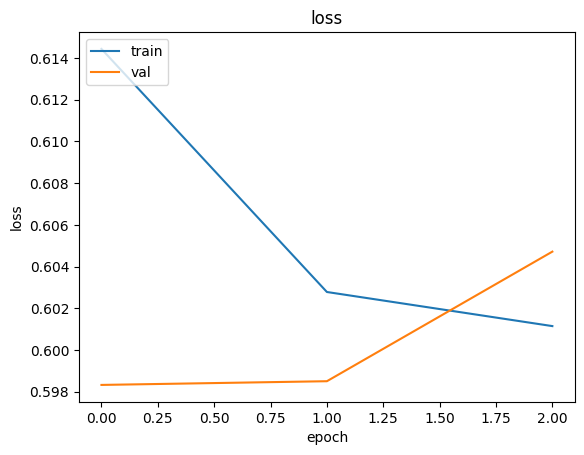

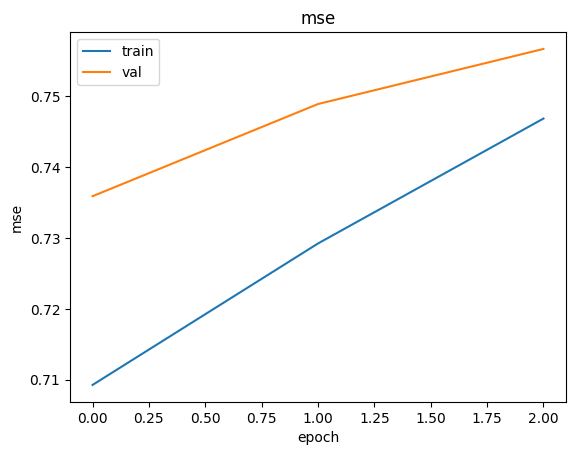

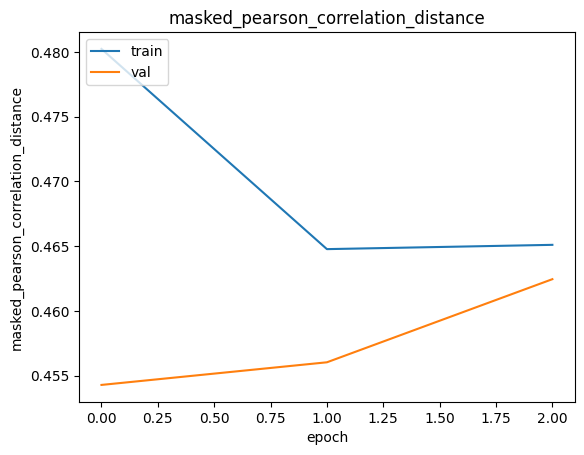

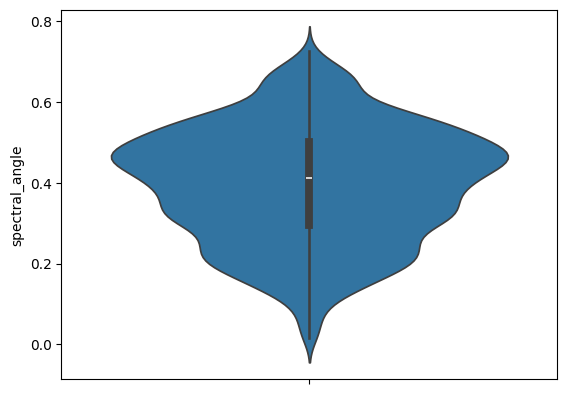

In [48]:
# you can generate a complete report for intensity by calling generate_report
# the function takes the test dataset object and the predictions as arguments

report.generate_report(test_int_data, predictions)

In [49]:
# you can also manually see the results by calling other utility functions
from dlomix.reports.postprocessing import normalize_intensity_predictions


predictions_df = report.generate_intensity_results_df(test_int_data, predictions)
predictions_df.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw
0,AAADQMRDFLVR,"[0.10342729091644287, 0.020429786294698715, 5....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,AAADQMRDFLVR,"[0.10342729091644287, 0.020429786294698715, 5....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,AAADQMRDFLVR,"[0.10342729091644287, 0.020429786294698715, 5....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,AAADQMRDFLVR,"[0.10342729091644287, 0.020429786294698715, 5....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,AAADQMRDFLVR,"[0.25115808844566345, 0.017231225967407227, 0....","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0..."


In [50]:
predictions_acc = normalize_intensity_predictions(predictions_df)
predictions_acc.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw,spectral_angle
0,AAADQMRDFLVR,0.404988,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.331603
1,AAADQMRDFLVR,0.404988,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.331603
2,AAADQMRDFLVR,0.404988,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.326896
3,AAADQMRDFLVR,0.404988,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.326896
4,AAADQMRDFLVR,0.392681,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0...",0.149554


In [51]:
predictions_acc['spectral_angle'].describe()

count    2416.000000
mean        0.397024
std         0.143058
min         0.015440
25%         0.295799
50%         0.411395
75%         0.500688
max         0.727255
Name: spectral_angle, dtype: float64

<Axes: ylabel='spectral_angle'>

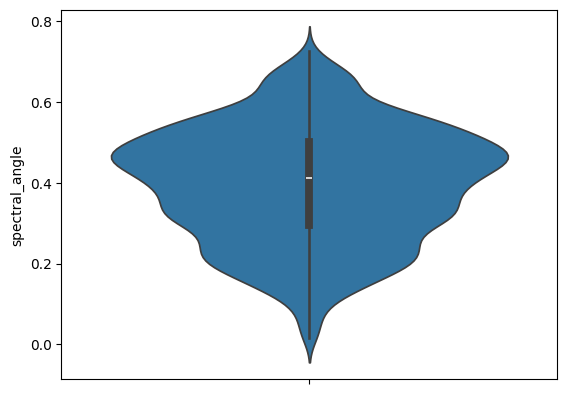

In [52]:
import seaborn as sns

sns.violinplot(predictions_acc['spectral_angle'])